IMPORTANT NOTE:

The classifier NN model is obtained from running https://github.com/NSK0904/wine_nn_training/blob/main/nn_training_nikhil.ipynb

The generated file model_class_weights.ckpt must be loaded in the colab data for this notebook to work

# 🧩 What is UMAP?

**UMAP (Uniform Manifold Approximation and Projection)** is a technique for **reducing high-dimensional data** to 2D or 3D while keeping the important structure of the data.

It works by:
1. Finding each point’s **nearest neighbors** in the original data.
2. Building a graph that shows how points are related.
3. Placing the points in a lower-dimensional space so that **similar points stay close** and **different points stay apart**.

UMAP is often used for **visualizing patterns**, **clustering**, or **finding structure** in complex datasets.  


## UMAP vs t-SNE vs PCA?
**Reminders from Lesson 06**

**PCA** preserves **global** structure only.

**t-SNE** preserves **local** structure only.

**UMAP** is **faster** than t-SNE.
UMAP can preserves both local and global structure. **But** is higly sensitive to **hyperparameter tuning**.

# ⚙️ Main Parameters in UMAP

UMAP’s behavior mainly depends on a few key parameters:

- **`n_neighbors`** → Controls how many nearby points are considered when building the graph.  
  - Small values focus on local structure (many small clusters).  
  - Large values capture more global structure (broader patterns).

- **`min_dist`** → Sets how tightly points can be packed together in the low-dim space.  
  - Smaller = compact clusters.  
  - Larger = more spread-out points.

- **`n_components`** → Number of dimensions for the output embedding.  
  - Usually 2 for visualization, 3 for exploration.

- **`metric`** → Defines how distance between points is measured.  
  - Common choices: *'euclidean'*, *'cosine'*, *'manhattan'*.  
  - The choice affects how similarity is calculated in high-dim space.

`import umap`

`reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=42)`

`embedding = reducer.fit_transform(X)`

`plt.scatter(embedding[:, 0], embedding[:, 1], c=y)`

# Wine dataset

|                             |   Min|   Max|   Mean|     SD|
|--- |---: |---: | ---:| ---:|
|Alcohol:                      |11.0 | 14.8   | 13.0  | 0.8|
|Malic Acid:                   |0.74 | 5.80   | 2.34  |1.12|
|Ash:                          |1.36 | 3.23   | 2.36  |0.27|
|Alcalinity of Ash:            |10.6 | 30.0   | 19.5  | 3.3|
|Magnesium:                    |70.0 |162.0   | 99.7  |14.3|
|Total Phenols:                |0.98 | 3.88   | 2.29  |0.63|
|Flavanoids:                   |0.34 | 5.08   | 2.03  |1.00|
|Nonflavanoid Phenols:         |0.13 | 0.66   | 0.36  |0.12|
|Proanthocyanins:              |0.41 | 3.58   | 1.59  |0.57|
|Colour Intensity:             | 1.3 | 13.0   |  5.1  | 2.3|
|Hue:                          |0.48 | 1.71   | 0.96  |0.23|
|OD280/OD315 of diluted wines: |1.27 | 4.00   | 2.61  |0.71|
|Proline:                      | 278 | 1680   |  746  | 315|

#Class separation with UMAP and PCA

How easy it is to separate the three different classes.

In [ ]:
from sklearn import datasets

wine_data = datasets.load_wine()
print(wine_data['DESCR'])

X = wine_data['data']
y = wine_data['target']

print('data.shape\t',X.shape,
      '\ntarget.shape \t',y.shape)

import numpy as np
import pandas as pd

datawine = pd.DataFrame(data= np.c_[X,y],columns= wine_data['feature_names'] + ['target'])
datawine

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [ ]:
import umap.umap_ as umap

# Apply UMAP to the data
reducer = umap.UMAP(n_components=2, random_state=42)
umap_features = reducer.fit_transform(X)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the data
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)

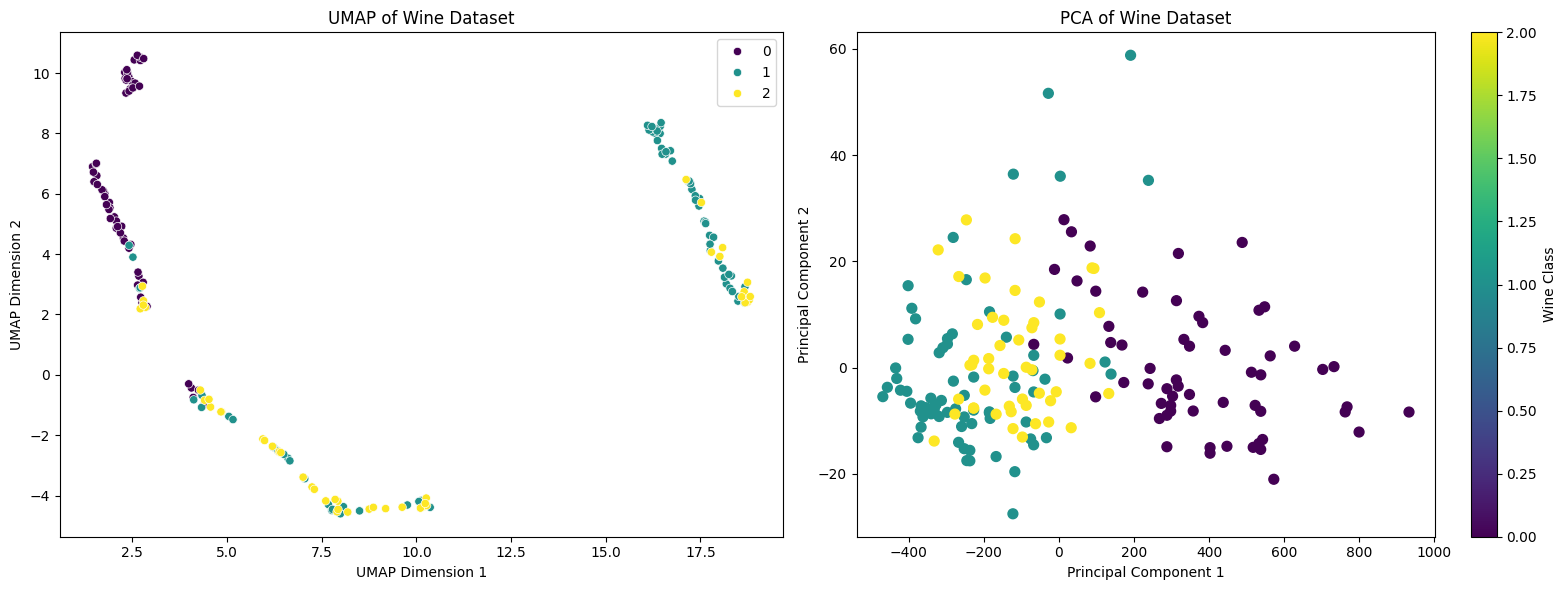

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize UMAP and PCA results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# UMAP plot on the left
sns.scatterplot(x=umap_features[:, 0], y=umap_features[:, 1], hue=y, legend='full', ax=axes[0], palette='viridis')
axes[0].set_title('UMAP of Wine Dataset')
axes[0].set_xlabel('UMAP Dimension 1')
axes[0].set_ylabel('UMAP Dimension 2')

# PCA plot on the right
scatter = axes[1].scatter(pca_features[:, 0], pca_features[:, 1], c=y, cmap='viridis', s=50)
axes[1].set_title('PCA of Wine Dataset')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
plt.colorbar(scatter, ax=axes[1], label='Wine Class')

plt.tight_layout()
plt.show()

## Tuning UMAP hyperparameters

**Why?** Find the best visualisation to separate classes

In unsupervised clustering: UMAP allows exploring possible clusters in the data

In supervised classification: UMAP compares clusters to assigned labels

In [ ]:
# define some usefull functions used in the rest of this notebook
import umap
import seaborn as sns
import matplotlib.pyplot as plt

def plot_sensitivity_metrics(metrics, X, y):
    fig, axes = plt.subplots(1, len(metrics), figsize=(14, 5))
    for i, metric in enumerate(metrics):
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric=metric, random_state=42)
        embedding = reducer.fit_transform(X)
        sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y, legend='full', ax=axes[i], palette='viridis')
        axes[i].set_title(f'{metric} metric')
        axes[i].set_xlabel('UMAP Dimension 1')
        axes[i].set_ylabel('UMAP Dimension 2')
    plt.tight_layout()
    plt.show()

def plot_sensitivity_neighbors(neighbors, X, y):
    fig, axes = plt.subplots(1, len(neighbors), figsize=(14, 5))
    for i, neighbor in enumerate(neighbors):
        reducer = umap.UMAP(n_neighbors=neighbor, min_dist=0.1, n_components=2, metric='euclidean', random_state=42)
        embedding = reducer.fit_transform(X)
        sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y, legend='full', ax=axes[i], palette='viridis')
        axes[i].set_title(f'{neighbor} neighbors')
        axes[i].set_xlabel('UMAP Dimension 1')
        axes[i].set_ylabel('UMAP Dimension 2')
    plt.tight_layout()
    plt.show()

def plot_senesitivity_min_dists(min_dists, X, y):
    fig, axes = plt.subplots(1, len(min_dists), figsize=(14, 5))
    for i, min_dist in enumerate(min_dists):
        reducer = umap.UMAP(n_neighbors=15, min_dist=min_dist, n_components=2, metric='euclidean', random_state=42)
        embedding = reducer.fit_transform(X)
        sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y, legend='full', ax=axes[i], palette='viridis')
        axes[i].set_title(f'{min_dist} min dist')
        axes[i].set_xlabel('UMAP Dimension 1')
        axes[i].set_ylabel('UMAP Dimension 2')
    plt.tight_layout()
    plt.show()

## n_neigbhors

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for p

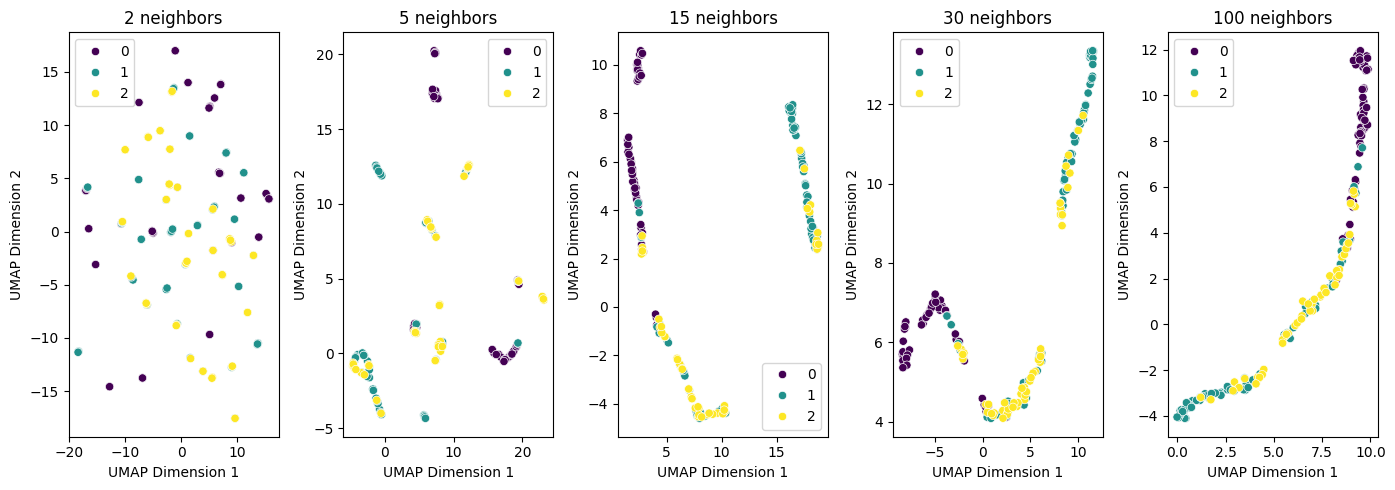

In [ ]:
neighbors=[2, 5, 15, 30, 100]

plot_sensitivity_neighbors(neighbors, X, y)

# Observations:
# 15 default value
# Low value of n_neibhor --> local structure
# High value --> global structure

## min_distance

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


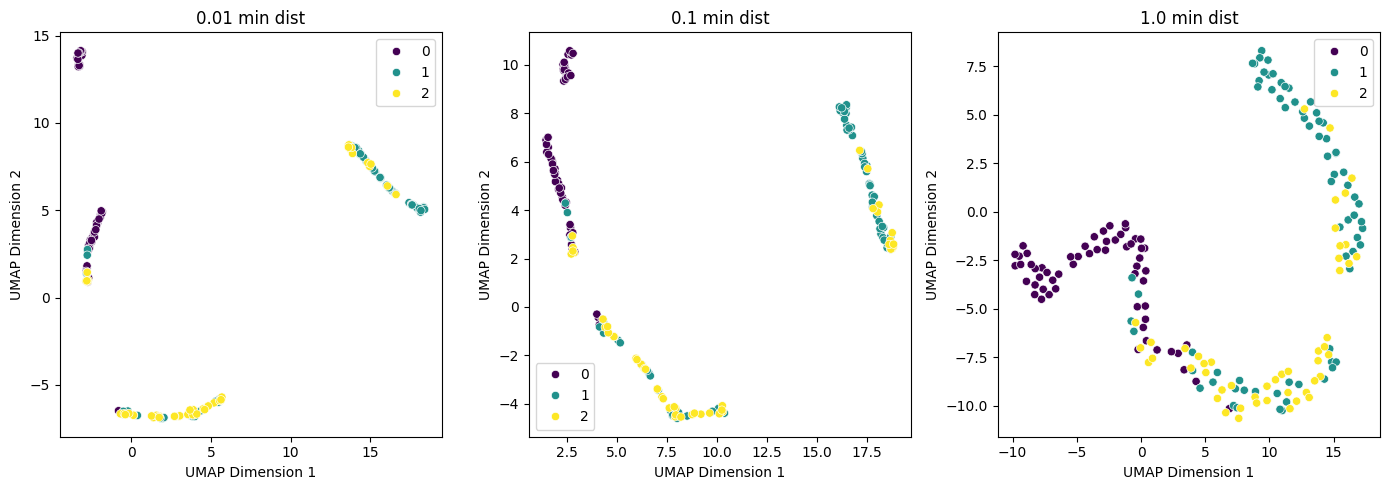

In [ ]:
min_dists=[0.01, 0.1, 1.0]

#min_dists=[0.01, 0.1, 1.0]

plot_senesitivity_min_dists(min_dists, X, y)

# Observations:
# -  with a larger distance, classes are less clearly separated

## metric

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:576: RuntimeWarning: overflow encountered in cast
  knn_dists = knn_dists.astype(np.float32)


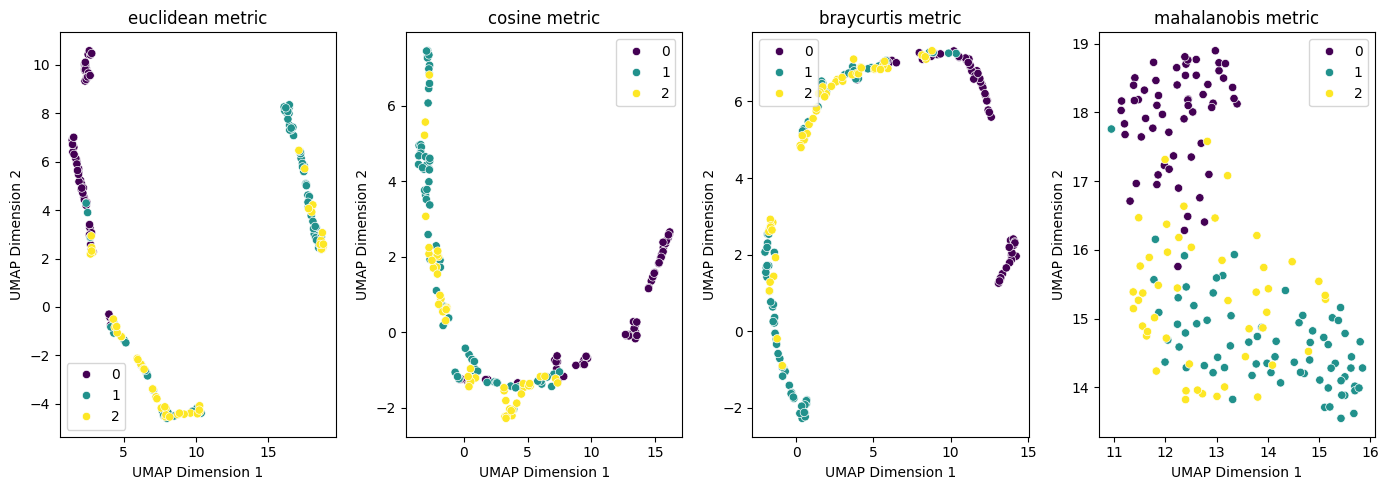

In [ ]:
metrics=['euclidean', 'cosine', 'braycurtis', 'mahalanobis']

plot_sensitivity_metrics(metrics, X, y)

# Observations:
# - classes 0 and 2 are well separated, some samples for class 1 are mixing with the two other classes in all metrics
# - what is the best metrics?

# UMAP to interpret or diagnose a classifier


## Application to a NN classifier trained on the wine dataset
* UMAP on features (above)
* UMAP on latent representations
* UMAP on predicted probabilities

Julia makes one slide for:
Suggestion: add a sketch of a NN showing "where" are the features, the latent representations and the predicted probabilities

## NN classifier

In [ ]:
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()
X= st_x.fit_transform(X)

import torch
import torch.nn as nn
import torch.nn.functional as F

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.hidden1 = nn.Linear(input_size, 15)
        self.linear = nn.Linear(15, num_classes)

    def forward(self, x):
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.linear(x)
        return x

# Create an instance of the model and move it to the device
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

input_size = 13
num_classes = 3
model = LogisticRegression(input_size, num_classes).to(device)


# load weights
model.load_state_dict(torch.load('model_class_weights.ckpt', weights_only=True))

# switch to eval mode
model.eval()

# Register hook to the hidden layer (e.g., model.net[0] if it's the first Linear layer)
hidden_outputs = []
def hook(module, input, output):
    hidden_outputs.append(output.detach())
hook_handle = model.hidden1.register_forward_hook(hook)

with torch.no_grad():
    logits = model(X.to(device))
    # Get predicted probabilities
    probabilities = F.softmax(logits, dim=1).cpu().numpy()
    # Get predictions
    _, predicted = torch.max(logits, 1)
    y_pred = predicted.cpu().numpy()


hook_handle.remove()

hidden_features = hidden_outputs[0].numpy()

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


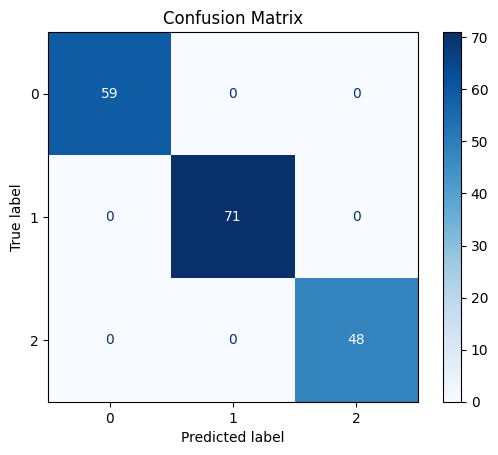

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## UMAP On Latent Representations
Apply UMAP to the output of the last hidden layer of the neural network. This shows how the model internally represents the data.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


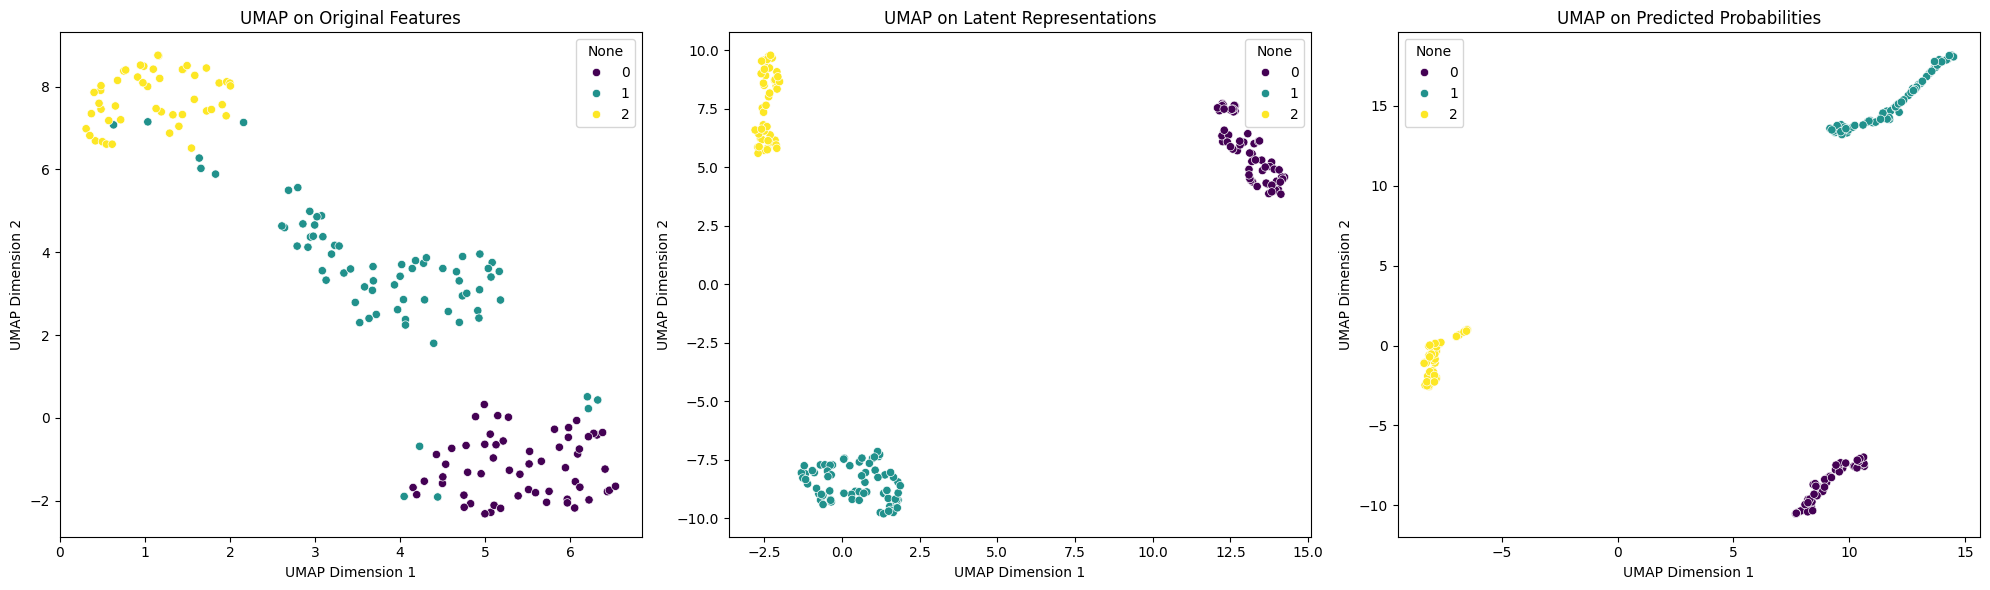

In [ ]:
# Apply UMAP to the original features
reducer_features = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=42)
umap_features = reducer_features.fit_transform(X)

# Apply UMAP to the latent representations
reducer_hidden = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=42)
umap_hidden = reducer_hidden.fit_transform(hidden_features)

# Apply UMAP to the predicted probabilities
reducer_probs = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=42)
umap_probs = reducer_probs.fit_transform(probabilities)

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# UMAP on original features
sns.scatterplot(x=umap_features[:, 0], y=umap_features[:, 1], hue=y, legend='full', ax=axes[0], palette='viridis')
axes[0].set_title('UMAP on Original Features')
axes[0].set_xlabel('UMAP Dimension 1')
axes[0].set_ylabel('UMAP Dimension 2')

# UMAP on latent representations
sns.scatterplot(x=umap_hidden[:, 0], y=umap_hidden[:, 1], hue=y, legend='full', ax=axes[1], palette='viridis')
axes[1].set_title('UMAP on Latent Representations')
axes[1].set_xlabel('UMAP Dimension 1')
axes[1].set_ylabel('UMAP Dimension 2')

# UMAP on predicted probabilities
sns.scatterplot(x=umap_probs[:, 0], y=umap_probs[:, 1], hue=y, legend='full', ax=axes[2], palette='viridis')
axes[2].set_title('UMAP on Predicted Probabilities')
axes[2].set_xlabel('UMAP Dimension 1')
axes[2].set_ylabel('UMAP Dimension 2')

plt.tight_layout()
plt.show()

# Conclusions
One more tool in our toolbox next to PCA and t-SNE for high-dimensional data for:
- Visualisation
- Clustering
- Classification

**Highly sensitive to hyperparameters tuning**:
- Twick parameters
- Test other methods (PCA, t-SNE)

# References
https://umap-learn.readthedocs.io/en/latest/parameters.html
https://www.youtube.com/watch?v=jth4kEvJ3P8
https://www.youtube.com/watch?v=eN0wFzBA4Sc
https://umap-learn.readthedocs.io/en/latest/basic_usage.html
